In [0]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [48]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training Data Shape :',train_X.shape, train_Y.shape)
print('Test Data Sample: ',test_X.shape,test_Y.shape)

Training Data Shape : (60000, 28, 28) (60000,)
Test Data Sample:  (10000, 28, 28) (10000,)


In [49]:
classes=np.unique(train_Y)
nclasses=len(classes)
print("Number of classes=",nclasses)
print("Classes are ",classes)

Number of classes= 10
Classes are  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Class Label: 9')

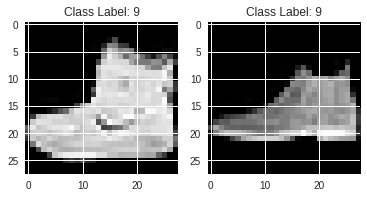

In [50]:
plt.subplot(121)
plt.imshow(train_X[0,:,:],cmap='gray')
plt.title("Class Label: {}".format(train_Y[0]))

plt.subplot(122)
plt.imshow(test_X[0,:,:],cmap='gray')
plt.title("Class Label: {}".format(test_Y[0]))

In [51]:
#Converting images with 28*28 dimensions into 28*28*1 matrix

train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)
train_X.shape,test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
#Converting the data from int8 format into float32 format

train_X=train_X.astype('float32')
test_X=test_X.astype('float32')

#Converting the pixels size of the image from 0-255 into 0-1

train_X=train_X/255
test_X=test_X/255

In [53]:
#Changing the labels from categorical to one-hot encoding


train_Y_one_hot=to_categorical(train_Y)
test_Y_one_hot=to_categorical(test_Y)
print("Categorical data", train_Y[0])
print("After one_coding", train_Y_one_hot[0])

Categorical data 9
After one_coding [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [54]:
#Splitting into train and test split

from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label=train_test_split(train_X,train_Y_one_hot,test_size=0.2,random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
batch_size=64
num_classes=10
epochs=20

In [0]:
#Building the neural network architecture

fashion_model=Sequential()

fashion_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Flatten())
fashion_model.add(Dense(128,activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.25))

fashion_model.add(Dense(num_classes,activation='softmax'))

In [0]:
#Compiling the model

fashion_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [69]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
__________

In [70]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 16s 336us/step - loss: 0.5805 - acc: 0.7843 - val_loss: 0.3673 - val_acc: 0.8658
Epoch 2/20
42752/48000 [=========================>....] - ETA: 1s - loss: 0.3746 - acc: 0.8615

48000/48000 [==============================] - 16s 324us/step - loss: 0.3698 - acc: 0.8631 - val_loss: 0.2993 - val_acc: 0.8902
Epoch 3/20
48000/48000 [==============================] - 15s 319us/step - loss: 0.3203 - acc: 0.8823 - val_loss: 0.2844 - val_acc: 0.8957
Epoch 4/20
21824/48000 [============>.................] - ETA: 7s - loss: 0.2934 - acc: 0.8895

48000/48000 [==============================] - 15s 321us/step - loss: 0.2906 - acc: 0.8908 - val_loss: 0.2567 - val_acc: 0.9048
Epoch 5/20
48000/48000 [==============================] - 15s 323us/step - loss: 0.2698 - acc: 0.8996 - val_loss: 0.2571 - val_acc: 0.9016
Epoch 6/20
16960/48000 [=========>....................] - ETA: 9s - loss: 0.2571 - acc: 0.9035

48000/48000 [==============================] - 15s 319us/step - loss: 0.2538 - acc: 0.9056 - val_loss: 0.2403 - val_acc: 0.9140
Epoch 7/20
48000/48000 [==============================] - 15s 317us/step - loss: 0.2422 - acc: 0.9101 - val_loss: 0.2417 - val_acc: 0.9114
Epoch 8/20
16000/48000 [=========>....................] - ETA: 9s - loss: 0.2209 - acc: 0.9190

48000/48000 [==============================] - 15s 319us/step - loss: 0.2311 - acc: 0.9155 - val_loss: 0.2203 - val_acc: 0.9194
Epoch 9/20
48000/48000 [==============================] - 15s 315us/step - loss: 0.2229 - acc: 0.9173 - val_loss: 0.2239 - val_acc: 0.9178
Epoch 10/20
15744/48000 [========>.....................] - ETA: 9s - loss: 0.2131 - acc: 0.9224

48000/48000 [==============================] - 15s 317us/step - loss: 0.2139 - acc: 0.9204 - val_loss: 0.2212 - val_acc: 0.9191
Epoch 11/20
48000/48000 [==============================] - 15s 317us/step - loss: 0.2104 - acc: 0.9213 - val_loss: 0.2125 - val_acc: 0.9234
Epoch 12/20
15424/48000 [========>.....................] - ETA: 9s - loss: 0.1952 - acc: 0.9262

48000/48000 [==============================] - 15s 317us/step - loss: 0.2017 - acc: 0.9240 - val_loss: 0.2147 - val_acc: 0.9240
Epoch 13/20
48000/48000 [==============================] - 15s 316us/step - loss: 0.1975 - acc: 0.9251 - val_loss: 0.2062 - val_acc: 0.9289
Epoch 14/20
15424/48000 [========>.....................] - ETA: 9s - loss: 0.1957 - acc: 0.9254

48000/48000 [==============================] - 15s 315us/step - loss: 0.1943 - acc: 0.9259 - val_loss: 0.2128 - val_acc: 0.9237
Epoch 15/20
48000/48000 [==============================] - 15s 317us/step - loss: 0.1906 - acc: 0.9286 - val_loss: 0.2108 - val_acc: 0.9273
Epoch 16/20
15424/48000 [========>.....................] - ETA: 9s - loss: 0.1797 - acc: 0.9326

48000/48000 [==============================] - 15s 317us/step - loss: 0.1823 - acc: 0.9314 - val_loss: 0.2117 - val_acc: 0.9277
Epoch 17/20
48000/48000 [==============================] - 15s 319us/step - loss: 0.1810 - acc: 0.9315 - val_loss: 0.2173 - val_acc: 0.9253
Epoch 18/20
15168/48000 [========>.....................] - ETA: 9s - loss: 0.1733 - acc: 0.9335

48000/48000 [==============================] - 15s 314us/step - loss: 0.1783 - acc: 0.9328 - val_loss: 0.2087 - val_acc: 0.9270
Epoch 19/20
48000/48000 [==============================] - 15s 318us/step - loss: 0.1727 - acc: 0.9345 - val_loss: 0.2202 - val_acc: 0.9242
Epoch 20/20
15424/48000 [========>.....................] - ETA: 9s - loss: 0.1726 - acc: 0.9317

48000/48000 [==============================] - 15s 315us/step - loss: 0.1760 - acc: 0.9322 - val_loss: 0.2032 - val_acc: 0.9280


In [0]:
#Evaluating on the test dataset

test_eval=fashion_model.evaluate(test_X,test_Y_one_hot,verbose=0)


In [72]:
print("Test Loss", test_eval[0])
print("Test_Accuracy",test_eval[1])

Test Loss 0.21218550820946694
Test_Accuracy 0.9233


In [0]:
fashion_model.save('fashion_model.h5py')